In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import pickle
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("train.csv")

X = np.array(data.iloc[:, 3:])
y = np.array(data.iloc[:, 1:3])
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.80)

In [57]:
X

array([[ 36.2,  38.9, 199. , 200. , 240. , 197. ],
       [ 36.3,  37.7, 196. , 200. , 237. , 196. ],
       [ 36.7,  38. , 195. , 199. , 235. , 196. ],
       ...,
       [ 27.5,  99.9, 165. , 168. , 175. , 164. ],
       [ 27.4,  99.9, 163. , 166. , 174. , 161. ],
       [ 27.2,  99.9, 167. , 168. , 177. , 162. ]])

In [79]:
ozone_mae_train, ozone_mae_test = [], [] 
no2_mae_train, no2_mae_test = [], []
k_range = range(1, 10)
# global y_train
def solve():
    for k in k_range:
        clf = KNeighborsRegressor(n_neighbors=k, algorithm="auto", n_jobs = -1)
        clf.fit(X_train, y_train)
        test_preds = np.transpose(clf.predict(X_test))
        y_test_m = np.transpose(y_test)
        train_preds = np.transpose(clf.predict(X_train))
        y_train_m = np.transpose(y_train)
        ozone_mae_train.append(mean_absolute_error(train_preds[0], y_train_m[0]))
        no2_mae_train.append(mean_absolute_error(train_preds[1], y_train_m[1]))
        ozone_mae_test.append(mean_absolute_error(test_preds[0], y_test_m[0]))
        no2_mae_test.append(mean_absolute_error(test_preds[1], y_test_m[1]))
    
    optimalK = k_range[min(np.argmin(no2_mae_test), np.argmin(ozone_mae_test))]
    clf = KNeighborsRegressor(n_neighbors=optimalK, algorithm="kd_tree", n_jobs = -1)
    clf.fit(X_train, y_train)
    pickle.dump(clf, open("KNN.pkl", "wb"))
    print("MAE is minimum for value of k = {}".format(optimalK))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,6))
    fig.suptitle("MAE loss for train and test data")
    ax[0].plot(k_range, ozone_mae_test, color="blue", linewidth=3, marker="o",markersize=5)
    ax[0].plot(k_range, no2_mae_test, color="black", linewidth=3, marker="o", markersize=5)
    ax[0].set_xlabel("K values")
    ax[0].set_ylabel("MAE loss for test")
    ax[1].plot(k_range, ozone_mae_train, color="blue", linewidth=3, marker="o", markersize=5)
    ax[1].plot(k_range, no2_mae_train, color="black", linewidth=3, marker="o", markersize=5)
    ax[1].set_xlabel("K values")
    ax[1].set_ylabel("MAE loss for train data")
    ax[0].grid(), ax[0].legend(['OZONE', 'NO2']), ax[1].grid(), ax[1].legend(['OZONE', 'NO2']), fig.show()

MAE is minimum for value of k = 5


C:\Users\User\AppData\Local\Temp/ipykernel_12432/3924045725.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax[0].grid(), ax[0].legend(['OZONE', 'NO2']), ax[1].grid(), ax[1].legend(['OZONE', 'NO2']), fig.show()


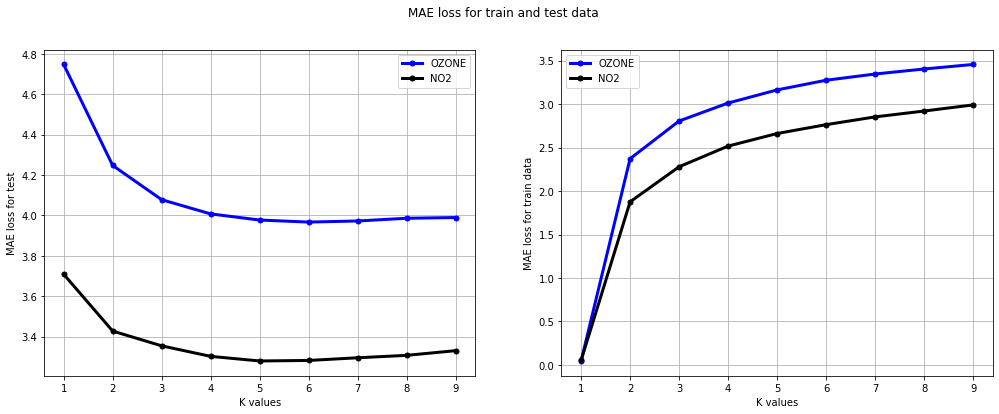

In [80]:
solve()
# clf = pickle.load(open("KNN.pkl", "rb"))
# train_preds = clf.predict(X_train)
# test_preds = clf.predict(X_test)
# test_preds = np.transpose(test_preds)
# train_preds = np.transpose(train_preds)
# y_train = np.transpose(y_train)
# y_test = np.transpose(y_test)
# print("The MSE Loss for the test samples are {} and {}".format(mean_absolute_error(test_preds[0], y_test[0]), mean_absolute_error(test_preds[1], y_test[1])))
# print("The MSE Loss for the train samples are {} and {}".format(mean_absolute_error(train_preds[0], y_train[0]), mean_absolute_error(train_preds[1], y_train[1])))

In [35]:
model = KNeighborsRegressor(n_neighbors=5, algorithm="auto", n_jobs = -1)
model.fit(X_train, y_train)
pickle.dump(model, open("knn_model.pkl", "wb"))

In [24]:
data = pd.read_csv("train.csv").drop( [ "OZONE", "NO2" ], axis = "columns" )
data.iloc[:, 1:].head(10)

,temp,humidity,no2op1,no2op2,o3op1,o3op2
0,36.2,38.9,199.0,200.0,240.0,197.0
1,36.3,37.7,196.0,200.0,237.0,196.0
2,36.7,38.0,195.0,199.0,235.0,196.0
3,37.0,37.5,193.0,198.0,233.0,195.0
4,36.8,36.8,191.0,198.0,231.0,195.0
5,37.2,36.9,190.0,198.0,232.0,195.0
6,37.3,36.8,189.0,198.0,231.0,194.0
7,37.3,36.4,187.0,196.0,229.0,194.0
8,37.0,35.5,188.0,196.0,231.0,194.0
9,37.6,36.0,187.0,195.0,228.0,192.0
